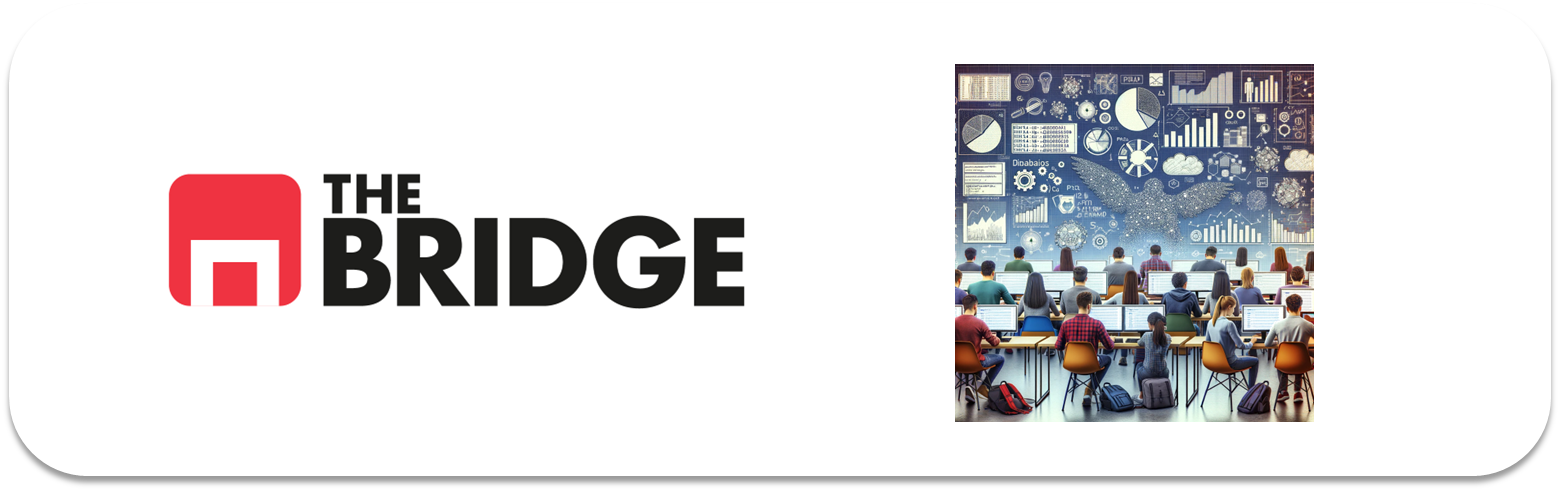

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [5]:
df = pd.read_csv("data/titanic.csv")
 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.drop(columns=[
    "class", "who", "adult_male", "deck", 
    "embark_town", "alive", "alone"
], inplace=True)

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


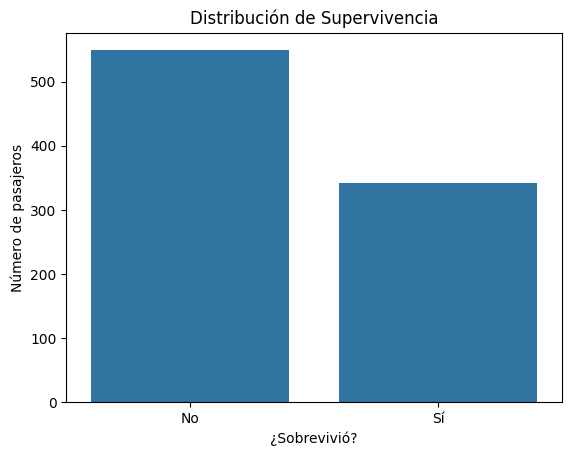

In [8]:
sns.countplot(x="survived", data=df)
plt.title("Distribución de Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Número de pasajeros")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

In [9]:
sobrevivientes = df["survived"].value_counts(normalize=True) * 100
print(sobrevivientes)

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [10]:
# Primero, eliminamos filas con nulos en 'embarked' (sólo 2 casos)
df = df.dropna(subset=["embarked"])

# Split estratificando por 'embarked'
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["embarked"]
)

# Verificamos que las proporciones se mantengan
print(train_df["embarked"].value_counts(normalize=True))
print(test_df["embarked"].value_counts(normalize=True))

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64
embarked
S    0.724719
C    0.191011
Q    0.084270
Name: proportion, dtype: float64


In [11]:
X_train = train_df.drop(columns=["survived"])
y_train = train_df["survived"]

X_test = test_df.drop(columns=["survived"])
y_test = test_df["survived"]


In [12]:
X_train.isnull().sum()

pclass        0
sex           0
age         138
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

# Columnas numéricas y categóricas
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

# Imputadores
imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

# Imputación
X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])


In [14]:
# Guardamos los valores usados en la imputación
mean_values = dict(zip(num_cols, imputer_num.statistics_))
mode_values = dict(zip(cat_cols, imputer_cat.statistics_))

Text(0.5, 1.0, 'Tasa de Supervivencia por Clase')

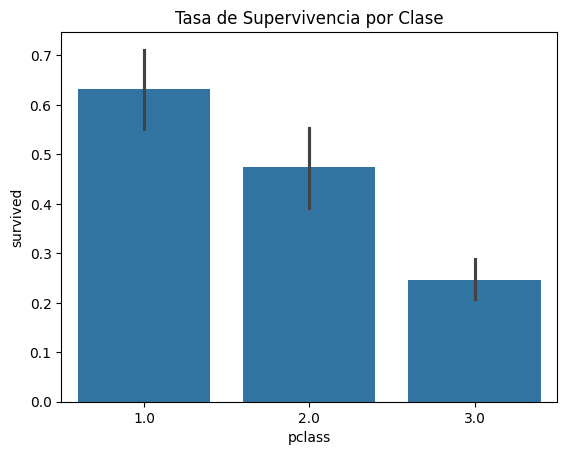

In [15]:
# MINI EDA
# 1. Supervivencia por clase (pclass)
sns.barplot(x="pclass", y=y_train, data=X_train.join(y_train))
plt.title("Tasa de Supervivencia por Clase")

Text(0.5, 1.0, 'Tasa de Supervivencia por Sexo')

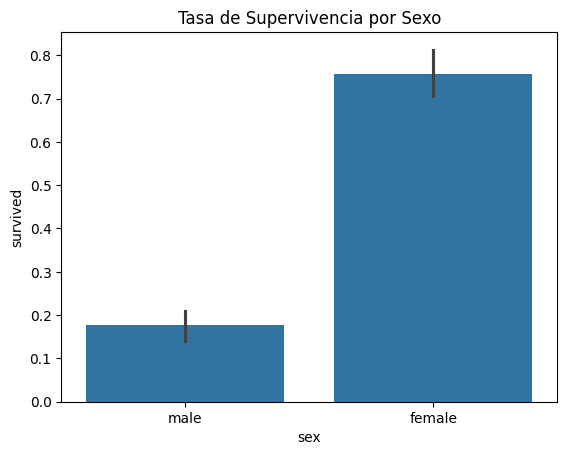

In [16]:
# 2. Supervivencia por sexo
sns.barplot(x="sex", y=y_train, data=X_train.join(y_train))
plt.title("Tasa de Supervivencia por Sexo")

Text(0.5, 1.0, 'Tasa de Supervivencia por Rango de Edad')

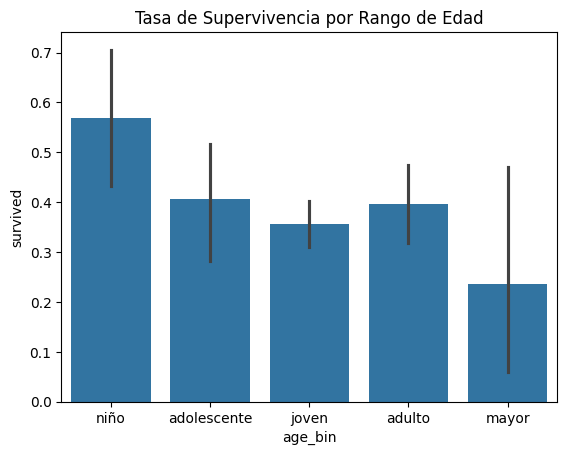

In [17]:
# 3. Supervivencia por edad (agrupada)
X_train["age_bin"] = pd.cut(X_train["age"], bins=[0, 12, 18, 35, 60, 100], labels=["niño", "adolescente", "joven", "adulto", "mayor"])
sns.barplot(x="age_bin", y=y_train, data=X_train.join(y_train))
plt.title("Tasa de Supervivencia por Rango de Edad")


<Axes: xlabel='sibsp', ylabel='survived'>

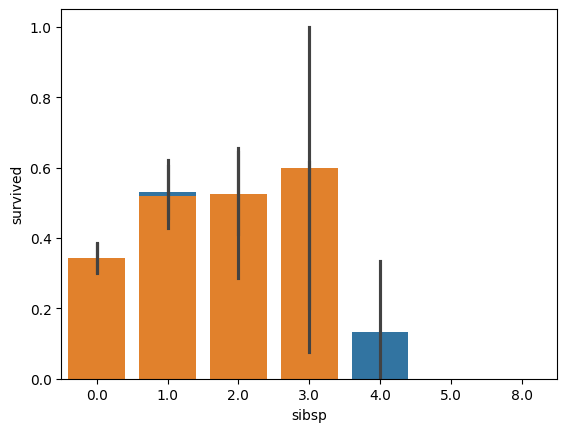

In [18]:
#4. Supervivencia según nº de familiares
sns.barplot(x="sibsp", y=y_train, data=X_train.join(y_train))
sns.barplot(x="parch", y=y_train, data=X_train.join(y_train))

(0.0, 100.0)

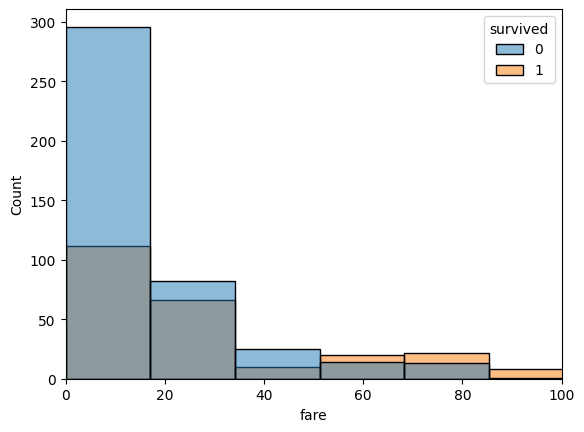

In [19]:
#5. Tarifa pagada
sns.histplot(data=X_train.join(y_train), x="fare", hue="survived", bins=30, kde=False)
plt.xlim(0, 100)  # Para evitar outliers extremos

<Axes: xlabel='embarked', ylabel='survived'>

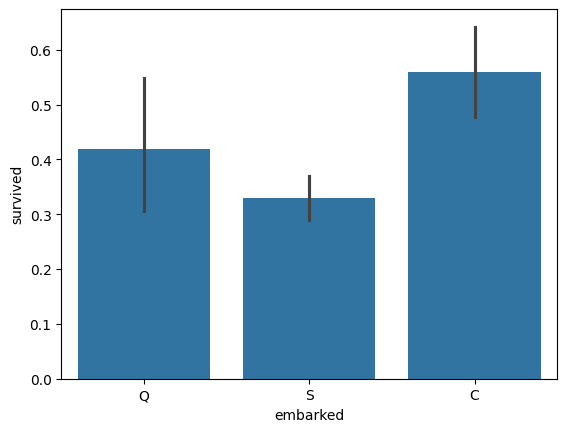

In [20]:
sns.barplot(x="embarked", y=y_train, data=X_train.join(y_train))

In [21]:
# One hot encoding en x train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [22]:
# Tratamos x test con mismas transformaciones
X_test[num_cols] = X_test[num_cols].fillna(mean_values)
X_test[cat_cols] = X_test[cat_cols].fillna(mode_values)

In [23]:
# Codificamos categóricas y alineamos columnas con x train encoded
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Reindexamos para asegurar mismas columnas
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [24]:
from sklearn.linear_model import LogisticRegression

# Creamos el modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamos
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
print("Accuracy en entrenamiento:", model.score(X_train_encoded, y_train))

Accuracy en entrenamiento: 0.8157524613220816


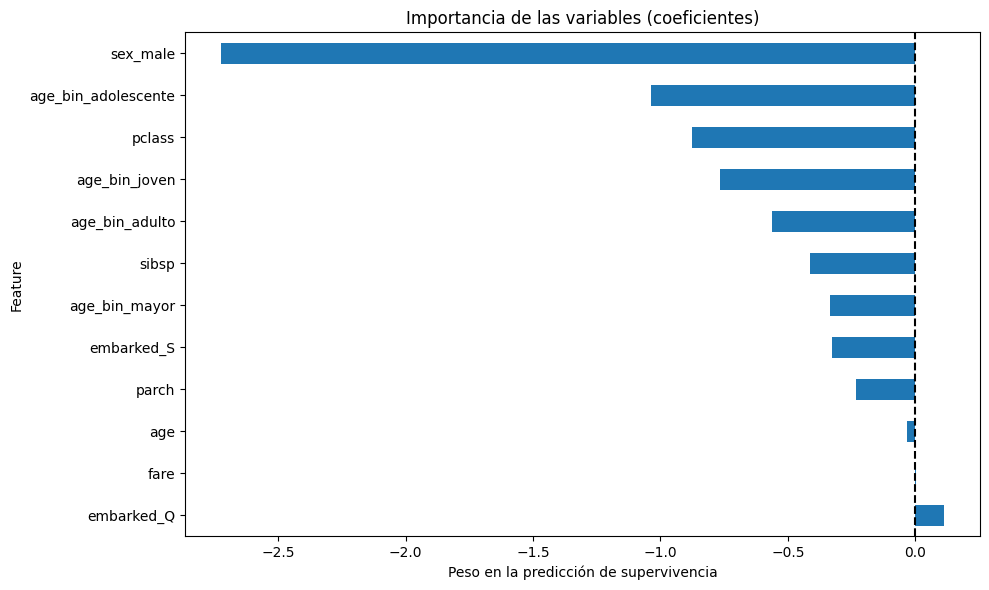

,Feature,Coeficiente
6,embarked_Q,0.112493
4,fare,0.004472
1,age,-0.030517
3,parch,-0.231310
7,embarked_S,-0.324757
11,age_bin_mayor,-0.335942
2,sibsp,-0.412621
10,age_bin_adulto,-0.563947
9,age_bin_joven,-0.764483
0,pclass,-0.874382


In [26]:
# Extraer coeficientes y emparejarlos con los nombres de las variables
coefs = pd.DataFrame({
    "Feature": X_train_encoded.columns,
    "Coeficiente": model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

# Gráfica
plt.figure(figsize=(10, 6))
coefs.set_index("Feature").Coeficiente.plot(kind="barh")
plt.axvline(0, color='black', linestyle='--')
plt.title("Importancia de las variables (coeficientes)")
plt.xlabel("Peso en la predicción de supervivencia")
plt.tight_layout()
plt.show()

# Mostrar tabla ordenada
coefs

| Variable              | Coeficiente | Interpretación                                                                     |
| --------------------- | ----------- | ---------------------------------------------------------------------------------- |
| `embarked_Q`          | **+0.112**  | Embarcar en Queenstown aumenta ligeramente la probabilidad de supervivencia.       |
| `fare`                | **+0.004**  | A mayor tarifa, ligeramente mayor probabilidad de supervivencia.                   |
| `age`                 | **-0.031**  | La edad tiene un pequeño impacto negativo (a mayor edad, menor supervivencia).     |
| `parch`               | **-0.231**  | Tener padres/hijos a bordo reduce ligeramente las probabilidades.                  |
| `embarked_S`          | **-0.325**  | Embarcar en Southampton se asocia a menor supervivencia.                           |
| `age_bin_mayor`       | **-0.336**  | Las personas mayores sobreviven menos.                                             |
| `sibsp`               | **-0.413**  | Ir acompañado de hermanos/pareja también reduce la probabilidad.                   |
| `age_bin_adulto`      | **-0.564**  | Adultos (35–60) tienen menor supervivencia.                                        |
| `age_bin_joven`       | **-0.764**  | Jóvenes (18–35) también tienen menor supervivencia (referencia podrían ser niños). |
| `pclass`              | **-0.874**  | A mayor número de clase (1 → 3), menos posibilidades de sobrevivir.                |
| `age_bin_adolescente` | **-1.035**  | Los adolescentes parecen tener aún menos supervivencia que adultos/jóvenes.        |
| `sex_male`            | **-2.723**  | Ser hombre es el factor que **más reduce** la probabilidad de supervivencia.    

🧠 Conclusión
El modelo refleja bien lo esperado:

👩‍🦰 Ser mujer → mayor probabilidad de supervivencia.

👑 Clase alta (pclass más baja) → mayor supervivencia.

👶 Ser niño (grupo de referencia en age_bin) → mayor supervivencia.

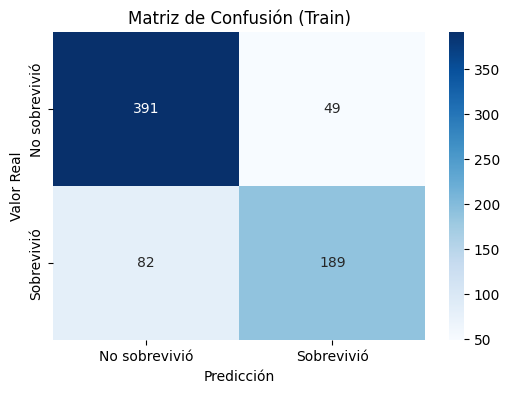

Informe de Clasificación (Train):

               precision    recall  f1-score   support

No sobrevivió       0.83      0.89      0.86       440
   Sobrevivió       0.79      0.70      0.74       271

     accuracy                           0.82       711
    macro avg       0.81      0.79      0.80       711
 weighted avg       0.81      0.82      0.81       711



In [50]:
# Predicciones sobre el conjunto de entrenamiento
y_train_pred = model.predict(X_train_encoded)

# Matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)

# Mostrar como gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No sobrevivió", "Sobrevivió"],
            yticklabels=["No sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Train)")
plt.show()

# Informe de clasificación
print("Informe de Clasificación (Train):\n")
print(classification_report(y_train, y_train_pred, target_names=["No sobrevivió", "Sobrevivió"]))

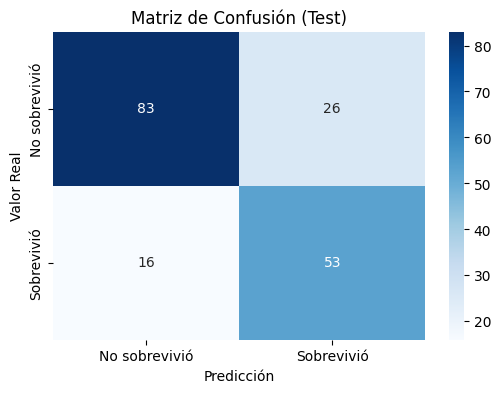

Informe de Clasificación (Test):

               precision    recall  f1-score   support

No sobrevivió       0.84      0.76      0.80       109
   Sobrevivió       0.67      0.77      0.72        69

     accuracy                           0.76       178
    macro avg       0.75      0.76      0.76       178
 weighted avg       0.77      0.76      0.77       178



In [51]:
# Predicciones (con test)
y_pred = model.predict(X_test_encoded)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar como gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No sobrevivió", "Sobrevivió"], 
            yticklabels=["No sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Test)")
plt.show()

# Informe de clasificación
print("Informe de Clasificación (Test):\n")
print(classification_report(y_test, y_pred, target_names=["No sobrevivió", "Sobrevivió"]))


In [52]:
# Crear DataFrame con los coeficientes del modelo
coeficientes = pd.DataFrame(
    model.coef_,                # una sola fila
    columns=X_train_encoded.columns   # nombres de las features
)

# Mostrar la tabla
print("Coeficientes del modelo de regresión logística:\n")
print(coeficientes.T.sort_values(by=0, ascending=False))

Coeficientes del modelo de regresión logística:

                            0
embarked_Q           0.112493
fare                 0.004472
age                 -0.030517
parch               -0.231310
embarked_S          -0.324757
age_bin_mayor       -0.335942
sibsp               -0.412621
age_bin_adulto      -0.563947
age_bin_joven       -0.764483
pclass              -0.874382
age_bin_adolescente -1.035028
sex_male            -2.723393


In [56]:
def show_coefs_binary(model, feature_names, figsize=(10, 6)):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Crear DataFrame con coeficientes
    df_coef = pd.DataFrame(
        model.coef_[0],             # sólo una fila
        index=feature_names,
        columns=["Coeficiente"]
    ).sort_values(by="Coeficiente")

    # Visualización
    plt.figure(figsize=figsize)
    df_coef["Coeficiente"].plot(kind="barh")
    plt.title("Coeficientes del modelo (Titanic - Regresión Logística)")
    plt.xlabel("Peso en la predicción de supervivencia")
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

    return df_coef

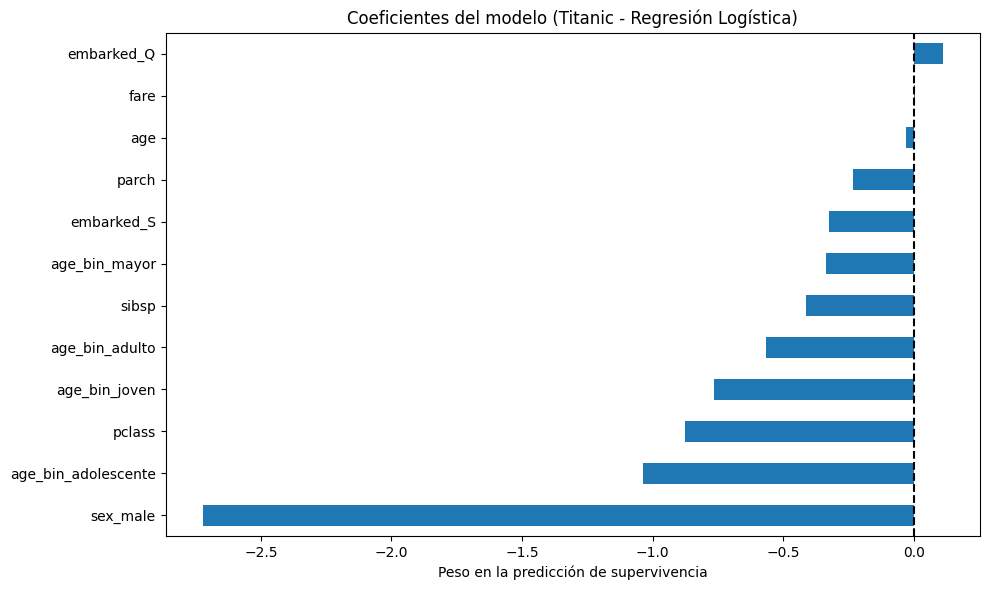

,Coeficiente
sex_male,-2.723393
age_bin_adolescente,-1.035028
pclass,-0.874382
age_bin_joven,-0.764483
age_bin_adulto,-0.563947
sibsp,-0.412621
age_bin_mayor,-0.335942
embarked_S,-0.324757
parch,-0.231310
age,-0.030517


In [57]:
show_coefs_binary(model, feature_names=X_train_encoded.columns)

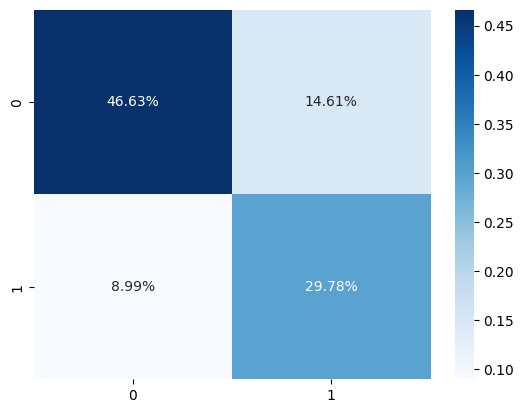

In [62]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [63]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.7640449438202247
MACRO PRECISION: 0.7546349571666027
MICRO RECALL: 0.7640449438202247
MACRO RECALL: 0.7647919159686212
MICRO ACCURACY: 0.7640449438202247


In [64]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 76.4 %
Error: 23.6 %


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       109
           1       0.67      0.77      0.72        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



In [66]:
# Predicciones
# Usamos una fila real modificada para mantener compatibilidad de columnas
pasajero = X_test_encoded.iloc[0].copy()

# Modificamos según perfil del punto 13
pasajero["pclass"] = 2
pasajero["age"] = 35
pasajero["fare"] = 0
pasajero["sibsp"] = 0
pasajero["parch"] = 0
pasajero["sex_male"] = 1
pasajero["embarked_S"] = 1
pasajero["embarked_Q"] = 0

# Asegura solo un grupo de edad activo
pasajero["age_bin_joven"] = 0
pasajero["age_bin_adulto"] = 1
pasajero["age_bin_mayor"] = 0
pasajero["age_bin_adolescente"] = 0

# Lo convertimos en DataFrame
new_data = pd.DataFrame([pasajero])

# Probabilidad y predicción
print(new_data)
print(model.predict_proba(new_data))  # Probabilidad de supervivencia
print(model.predict(new_data))        # Predicción: 0 o 1


     pclass  age  sibsp  parch  fare  sex_male  embarked_Q  embarked_S  \
223       2   35      0      0     0         1           0           1   

     age_bin_adolescente  age_bin_joven  age_bin_adulto  age_bin_mayor  
223                    0              0               1              0  
[[0.78575708 0.21424292]]
[0]


In [ ]:
# Nuevo target: clase del billete
y_multi = df["pclass"]

# Nuevas features: quitamos pclass y añadimos survived
X_multi = df.drop(columns=["pclass"])

# Dividimos con stratify en el target multiclase
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)



In [69]:
# Imputación
from sklearn.impute import SimpleImputer

num_cols = X_train_m.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X_train_m.select_dtypes(include="object").columns

imp_num = SimpleImputer(strategy="mean")
imp_cat = SimpleImputer(strategy="most_frequent")

X_train_m[num_cols] = imp_num.fit_transform(X_train_m[num_cols])
X_train_m[cat_cols] = imp_cat.fit_transform(X_train_m[cat_cols])


In [70]:
# Codificación
X_train_m_encoded = pd.get_dummies(X_train_m, drop_first=True)
X_test_m[cat_cols] = imp_cat.transform(X_test_m[cat_cols])
X_test_m[num_cols] = imp_num.transform(X_test_m[num_cols])
X_test_m_encoded = pd.get_dummies(X_test_m, drop_first=True)

# Reindexar para asegurar las mismas columnas
X_test_m_encoded = X_test_m_encoded.reindex(columns=X_train_m_encoded.columns, fill_value=0)


In [71]:
model_multi = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model_multi.fit(X_train_m_encoded, y_train_m)

c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [72]:
y_pred_m = model_multi.predict(X_test_m_encoded)
print("Clasificación por clase de billete (1ª, 2ª, 3ª):\n")
print(classification_report(y_test_m, y_pred_m))

Clasificación por clase de billete (1ª, 2ª, 3ª):

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        43
           2       1.00      0.46      0.63        37
           3       0.81      0.98      0.89        98

    accuracy                           0.87       178
   macro avg       0.92      0.80      0.82       178
weighted avg       0.89      0.87      0.85       178



In [73]:
new_data = X_test_m_encoded.iloc[[0]] 
print(model_multi.predict_proba(new_data))  # Probabilidades de clase
print(model_multi.predict(new_data))        # Clase predicha

[[0.76107292 0.21022217 0.02870491]]
[1]
